<a href="https://colab.research.google.com/github/SentaFito53/aquaculture-iot-monitoring/blob/main/TRAIN_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Library Import & Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df = pd.read_csv('/content/writing_activity_COMBINED_20250617_083844.csv')
df


,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
0,1.750124e+09,0,-0.943963,-4.871939,-2.212494,-0.575741,-1.492794,-1.592798,0.036225,1.685869
1,1.750124e+09,0,-6.825465,-34.219146,-15.794897,-4.337035,-10.535805,-11.274673,0.240200,11.547747
2,1.750124e+09,0,-23.780070,-114.279498,-54.157765,-16.121861,-35.554625,-38.298714,0.720685,37.079906
3,1.750124e+09,0,-54.267267,-247.151308,-121.276485,-39.558836,-77.831099,-84.565000,1.311464,75.913511
4,1.750124e+09,0,-92.518933,-397.926581,-202.517447,-71.264175,-125.919843,-137.666792,1.666411,114.450688
...,...,...,...,...,...,...,...,...,...,...
2995,1.750124e+09,2,39.450570,-6.594064,-10.049184,-35.441897,-25.314835,-50.735500,-23.389443,550.697960
2996,1.750124e+09,2,37.164376,-5.078946,-3.913711,-22.437111,-16.352389,-49.546628,-23.796152,534.631697
2997,1.750124e+09,2,41.086160,3.852977,6.826754,-3.051496,-3.059044,-47.525298,-27.455270,523.877728
2998,1.750124e+09,2,49.166678,16.622089,17.793891,14.886765,8.753377,-45.380533,-32.659107,517.210928


## 2. Data Understanding

In [ ]:
print ("data shape : ", df.shape) #untuk mengetahui dimensi data (row, col)

data shape :  (3000, 10)


In [ ]:
df.info() #untuk mengetahui tipe data dari setiap kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       3000 non-null   float64
 1   activity_label  3000 non-null   int64  
 2   ch_0            3000 non-null   float64
 3   ch_1            3000 non-null   float64
 4   ch_2            3000 non-null   float64
 5   ch_3            3000 non-null   float64
 6   ch_4            3000 non-null   float64
 7   ch_5            3000 non-null   float64
 8   ch_6            3000 non-null   float64
 9   ch_7            3000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 234.5 KB


In [ ]:
df.describe() #untuk mengetahui statistik deskriptif dari data

,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.750124e+09,1.000000,0.025776,-0.163070,-0.085750,-0.123591,-0.046103,-0.062815,0.086860,1.509716
std,1.002041e+01,0.816633,25.572603,50.544381,31.668465,25.464428,25.291968,29.857192,21.747156,53.323042
min,1.750124e+09,0.000000,-196.462017,-576.116630,-303.103820,-205.708063,-216.247408,-249.493742,-109.576564,-289.040817
25%,1.750124e+09,0.000000,-8.037264,-11.161928,-8.085524,-6.687666,-6.152412,-4.371620,-4.157532,-6.078212
50%,1.750124e+09,1.000000,-0.075655,-0.304812,-0.048644,0.277337,0.388842,0.272007,0.051304,-0.229155
75%,1.750124e+09,2.000000,7.642173,10.154161,8.457352,7.081684,7.394007,5.450429,3.965794,5.615299
max,1.750124e+09,2.000000,163.437809,273.020087,210.813030,213.273637,194.258310,280.202974,199.412893,610.923691


In [ ]:
df.activity_label.value_counts() #untuk mengetahui jumlah data dari setiap kategori

,count
activity_label,
0,1000
1,1000
2,1000


## 3. Cleaning Data
untuk menindaklanjuti data yang kosong, double, atau rusak

In [ ]:
df.isnull().sum() #untuk melihat missing value atau data yang kosong

,0
timestamp,0
activity_label,0
ch_0,0
ch_1,0
ch_2,0
ch_3,0
ch_4,0
ch_5,0
ch_6,0
ch_7,0


In [ ]:
df.duplicated().sum() #untuk melihat data yang duplikat

np.int64(0)

## 4.Exploratory Data Analysis (EDA)
Penjabaran data dari tiap" atribut data

/tmp/ipython-input-8-2645591038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'activity_label', data = df, palette='flare')


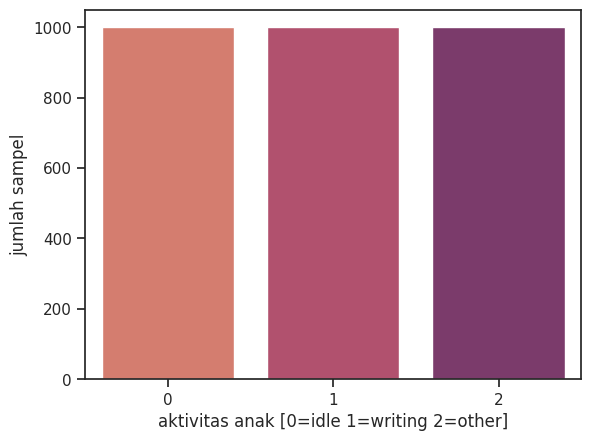

In [ ]:
sns.set_theme(style = 'ticks')
sns.countplot(x = 'activity_label', data = df, palette='flare')
plt.xlabel("aktivitas anak [0=idle 1=writing 2=other]")
plt.ylabel("jumlah sampel")
plt.show()

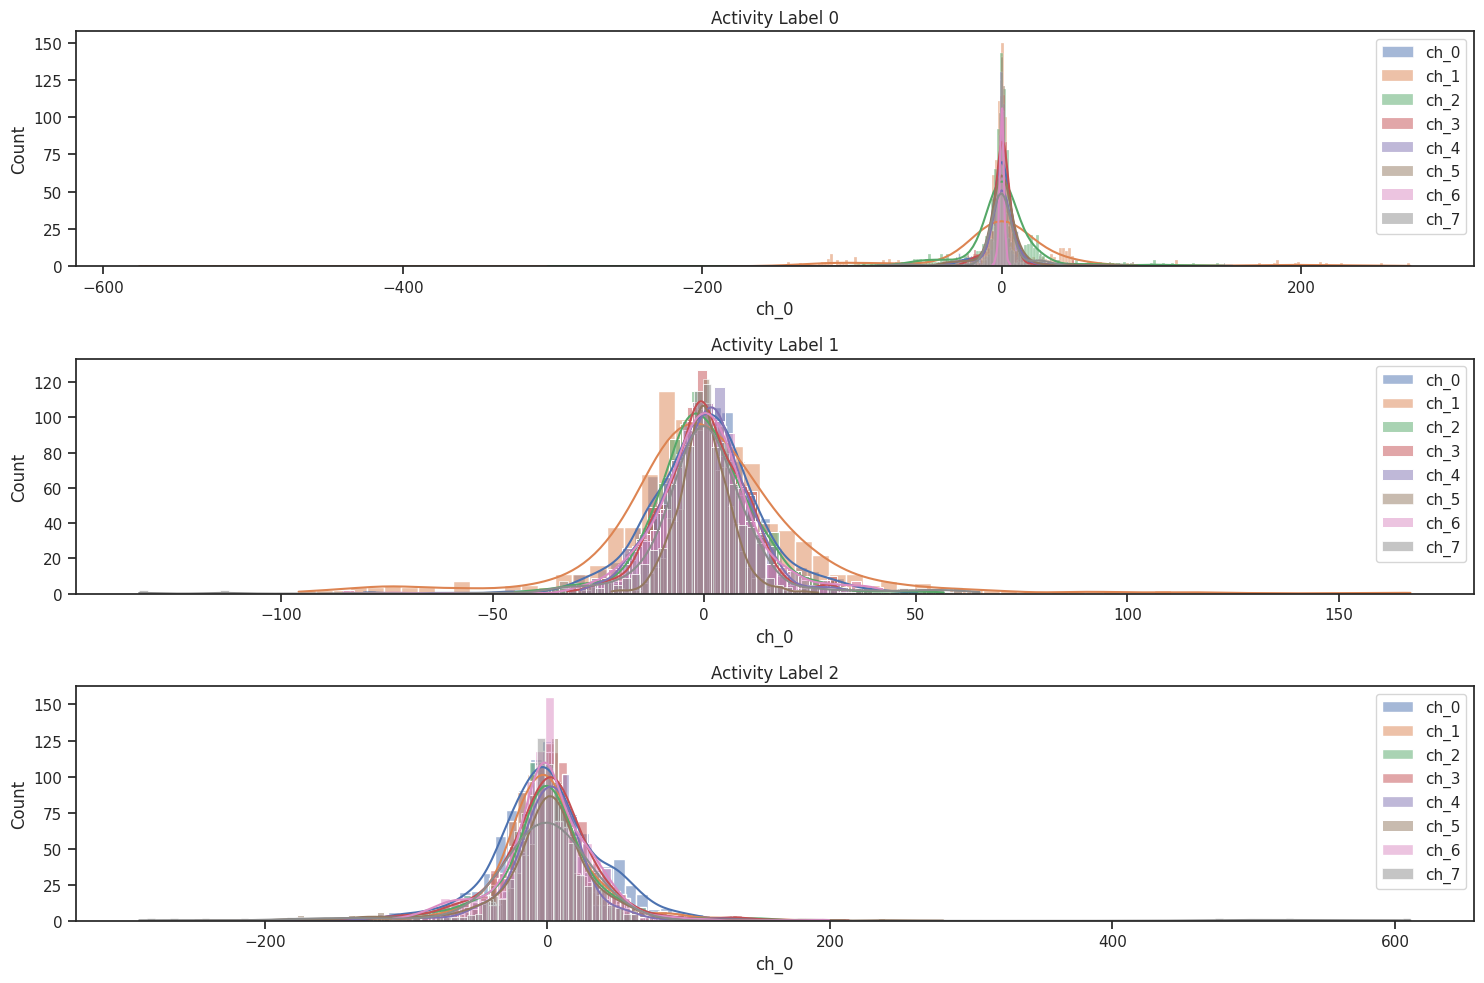

In [ ]:
plt.figure(figsize=(15, 10))
for i, label in enumerate([0, 1, 2], 1):
    plt.subplot(3, 1, i)
    df_label = df[df['activity_label'] == label]
    for ch in range(8):
        sns.histplot(df_label[f'ch_{ch}'], label=f'ch_{ch}', kde=True, alpha=0.5)
    plt.title(f'Activity Label {label}')
    plt.legend()
plt.tight_layout()
plt.show()

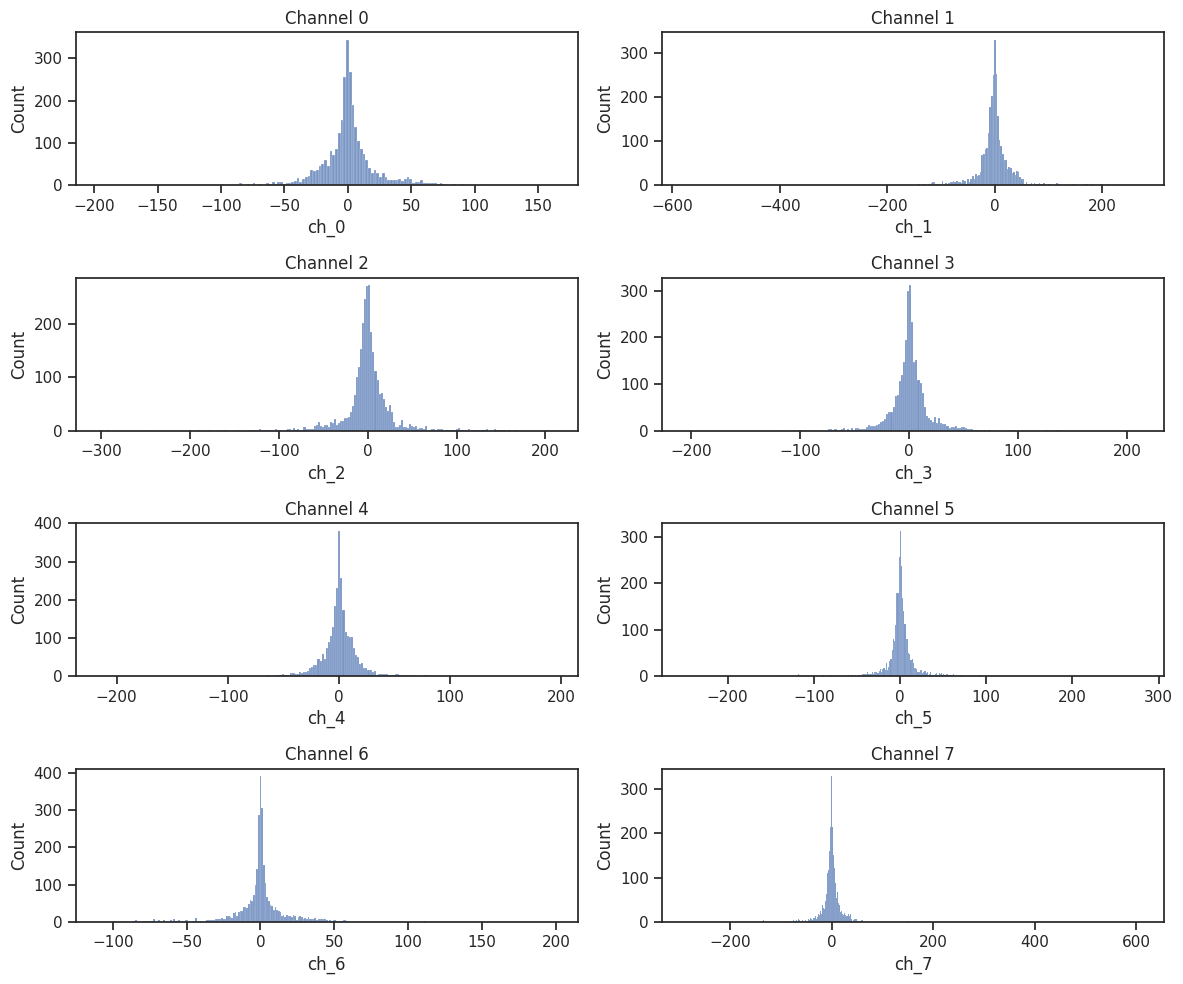

In [ ]:
# Visualisasi data dengan grafik dalam subplot terpisah
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
axes = axes.flatten()

for i in range(8):
    sns.histplot(df[f'ch_{i}'], ax=axes[i])
    axes[i].set_title(f'Channel {i}')

plt.tight_layout()
plt.show()

## 4. Data Preparation
Pada tahap ini pastikan data tidak ada yang bertipe string, kalau ada convert jadi int atau float

In [ ]:
df.head() #menampilkan 5 baris pertama data

,timestamp,activity_label,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
0,1.750124e+09,0,-0.943963,-4.871939,-2.212494,-0.575741,-1.492794,-1.592798,0.036225,1.685869
1,1.750124e+09,0,-6.825465,-34.219146,-15.794897,-4.337035,-10.535805,-11.274673,0.240200,11.547747
2,1.750124e+09,0,-23.780070,-114.279498,-54.157765,-16.121861,-35.554625,-38.298714,0.720685,37.079906
3,1.750124e+09,0,-54.267267,-247.151308,-121.276485,-39.558836,-77.831099,-84.565000,1.311464,75.913511
4,1.750124e+09,0,-92.518933,-397.926581,-202.517447,-71.264175,-125.919843,-137.666792,1.666411,114.450688


In [ ]:
# Proses membagi data menjadi variabel X dan Y

X = df.drop(columns = ['activity_label','timestamp']) #sebagai var X, kita mengambil data ch0-ch7, maka hapus label dan timestamp
y = df['activity_label'] #ambil activity label sebagai var Y

print("X : ", X.shape)
print("y : ", y.shape)


X :  (3000, 8)
y :  (3000,)


In [ ]:
# masuk proses spliting data
# untuk membagi banyak data yang ditrain dan dites

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 0,2 artinya pembagian data 80 banding 20, 80% train dan 20% test
# Dengan random_state=42 (atau angka lain), hasil pembagian akan sama persis setiap kali di-run.

In [ ]:
# Melihat hasil splitting data
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (2400, 8)
y_train :  (2400,)
X_test :  (600, 8)
y_test :  (600,)


## 5. Modeling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Accuracy KNN: {:.2f}%".format(KNN_acc*100)) #melihat tingkat akurasi

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       217
           1       0.82      0.80      0.81       197
           2       0.94      0.81      0.87       186

    accuracy                           0.87       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600

Accuracy KNN: 87.33%


## 6. Testing

In [ ]:
data_test = pd.read_csv('/content/writing_activity_WRITING_20250617_084315.csv')
data_test = df.drop(columns=['timestamp', 'activity_label'])  # Jika ada kolom lain selain ch_0-ch_7
data_test = data_test.head(5)
data_test = pd.DataFrame(data_test)
data_test

,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7
0,-0.943963,-4.871939,-2.212494,-0.575741,-1.492794,-1.592798,0.036225,1.685869
1,-6.825465,-34.219146,-15.794897,-4.337035,-10.535805,-11.274673,0.240200,11.547747
2,-23.780070,-114.279498,-54.157765,-16.121861,-35.554625,-38.298714,0.720685,37.079906
3,-54.267267,-247.151308,-121.276485,-39.558836,-77.831099,-84.565000,1.311464,75.913511
4,-92.518933,-397.926581,-202.517447,-71.264175,-125.919843,-137.666792,1.666411,114.450688


In [ ]:
pred_coba = knn.predict(data_test)
print("Hasil Prediksi dari Aktivitas Anak")
print(pred_coba)
print("0 = IDLE")
print("1 = WRITING")
print("2 = OTHER")

Hasil Prediksi dari Aktivitas Anak
[0 1 0 0 0]
0 = IDLE
1 = WRITING
2 = OTHER


## 7. Save Model dan Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Buat objek scaler dan fit-kan pada data latih
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model dengan data yang sudah diskalakan
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scaled, y_train)

# Simpan model dan scaler
joblib.dump(knn, 'model_knn.pkl')
joblib.dump(scaler, 'scaler_knn.pkl')

# Unduh ke komputer
from google.colab import files
files.download('model_knn.pkl')
files.download('scaler_knn.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8. Test Model

In [ ]:
import pandas as pd
import joblib

# 1. Load model dan scaler dari file .pkl
knn = joblib.load('/content/model_knn.pkl')
scaler = joblib.load('/content/scaler_knn.pkl')

# 2. Load data test dari CSV
data_test = pd.read_csv('/content/writing_activity_WRITING_20250617_084315.csv')

# 3. Ambil hanya fitur ch_0 sampai ch_7
# Pastikan nama kolomnya sesuai — jika kolomnya bernama 'ch_0', ..., 'ch_7'
fitur_sensor = ['ch_0', 'ch_1', 'ch_2', 'ch_3', 'ch_4', 'ch_5', 'ch_6', 'ch_7']
data_test = data_test[fitur_sensor]

# 4. Ambil hanya 20 baris pertama
data_test = data_test.head(1000)

# 5. Transformasikan data menggunakan scaler yang sudah dilatih
data_test_scaled = scaler.transform(data_test)

# 6. Lakukan prediksi
pred_coba = knn.predict(data_test_scaled)

# 7. Tampilkan hasil prediksi
print("Hasil Prediksi dari Aktivitas Anak")
print(pred_coba)
print("0 = IDLE")
print("1 = WRITING")
print("2 = OTHER")


Hasil Prediksi dari Aktivitas Anak
[0 0 0 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 2 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 2 2 1 2 1 1 1 